In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append(os.path.abspath('../'))
from data import Data

## Load Data

In [3]:
d = Data()

In [13]:
trackFeaturesDF = d.getAllUniqueTrackFeatures()

In [14]:
trackFeaturesDF.head()

,acousticness,catalog,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,uri,valence
0,0.5680,[{'popularity': 0}],0.458,0.591,0.000015,5,0.286,-5.621,1,0.0326,184.913,3,spotify:track:0000uJA4xCdxThagdLkkLR,0.654
1,0.7970,[{'popularity': 11}],0.455,0.623,0.903000,8,0.634,-11.572,1,0.0523,182.345,4,spotify:track:0002yNGLtYSYtc0X6ZnFvp,0.951
2,0.0178,[{'popularity': 13}],0.742,0.753,0.000000,1,0.133,-5.632,1,0.0364,132.064,4,spotify:track:00039MgrmLoIzSpuYKurn9,0.263
3,0.0860,[{'popularity': 22}],0.733,0.711,0.000000,1,0.451,-5.408,1,0.1580,138.076,4,spotify:track:0003Z98F6hUq7XxqSRM87H,0.346
4,0.0147,[{'popularity': 15}],0.584,0.947,0.000039,4,0.110,-3.700,1,0.0747,100.868,4,spotify:track:0004ExljAge0P5XWn1LXmW,0.461


In [15]:
trackFeaturesDF.count()

acousticness        2262133
catalog             2262133
danceability        2262133
energy              2262133
instrumentalness    2262133
key                 2262133
liveness            2262133
loudness            2262133
mode                2262133
speechiness         2262133
tempo               2262133
time_signature      2262133
uri                 2262133
valence             2262132
dtype: int64

In [4]:
d.createPlaylistAvgFeatures()

In [5]:
d.createPlaylistMaxFeatures()

## Univariate

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


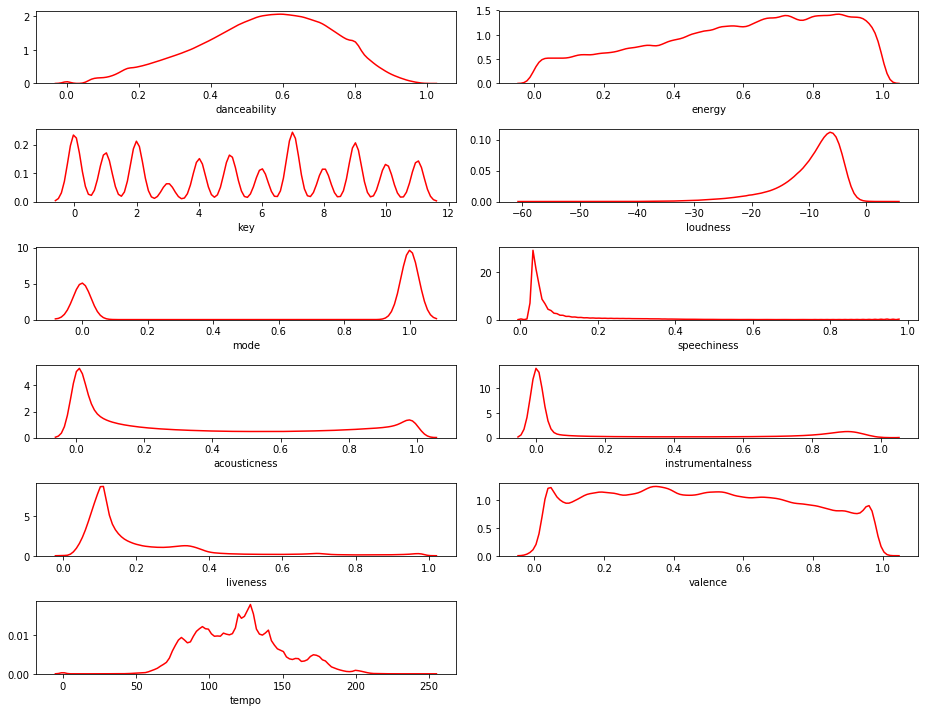

In [15]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
for i in range(1, len(cols)+1):
    plt.subplot(6, 2, i)
    sns.distplot(trackFeaturesDF[cols[i-1]], hist=False, color='r')
plt.tight_layout()